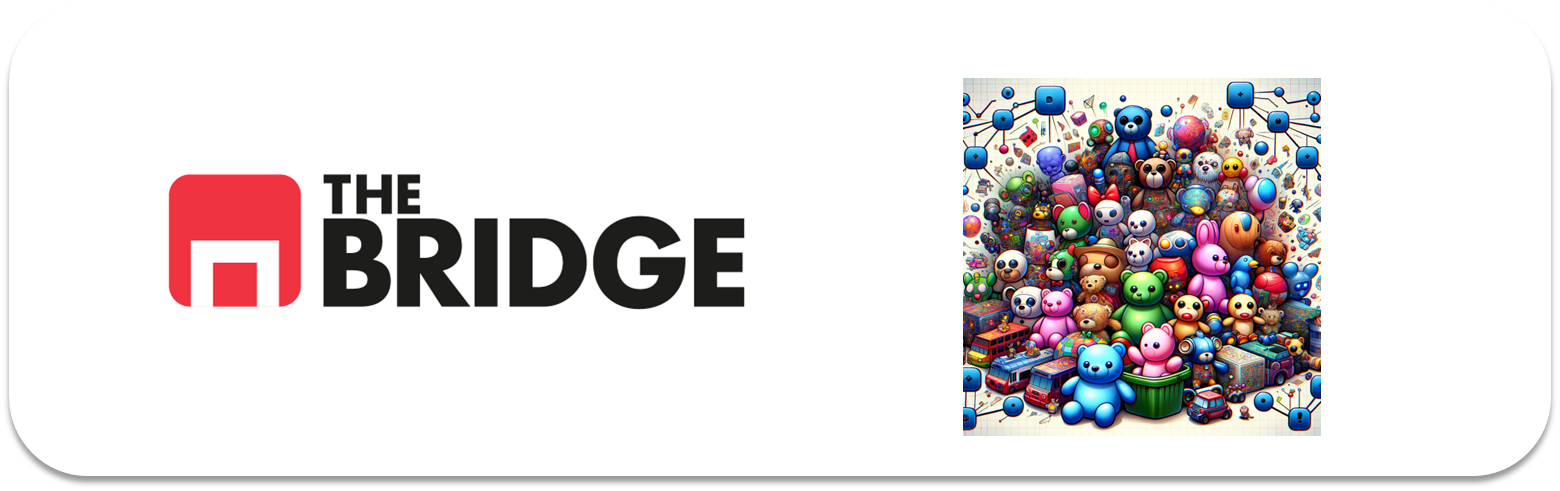

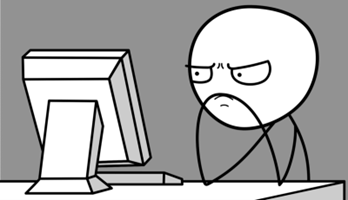

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [85]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Función para imprimir métricas de clasificación y matriz de confusión
def evaluar_modelo(y_true, y_pred, title="Métricas del modelo"):
    # Imprimir el reporte de clasificación con todas las métricas
    print(f"\n{title}")
    print(classification_report(y_true, y_pred, digits=4))

    # Generar y mostrar la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(f'Matriz de Confusión - {title}')
    plt.show()


## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [70]:
from sklearn.datasets import fetch_olivetti_faces
description = fetch_olivetti_faces()['DESCR']
description

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and\nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position\n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n=================   ==================

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [71]:
# Cargar el dataset de Olivetti Faces
data = fetch_olivetti_faces(shuffle=False)

# Obtener las imágenes y el target (las etiquetas de las personas)
images = data.images  # Imágenes en formato 64x64
targets = data.target  # Etiquetas de las imágenes (identidad de la persona)

# Aplanar las imágenes a 4096 features (64x64)
flattened_images = images.reshape((images.shape[0], -1))

# Crear un DataFrame con los datos
df = pd.DataFrame(flattened_images)
df['target'] = targets  # Agregar la columna de etiquetas

# Mostrar los primeros valores del target
print("Valores únicos del target:", np.unique(targets))

# Reordenar aleatoriamente el dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar el DataFrame reorganizado
df_shuffled

Valores únicos del target: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.194215,0.223140,0.314050,0.500000,0.636364,0.735537,0.797521,0.826446,0.847107,0.847107,...,0.206612,0.181818,0.165289,0.123967,0.123967,0.128099,0.136364,0.169421,0.165289,7
396,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830579,0.826446,0.822314,0.814050,...,0.264463,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835,10
397,0.611570,0.644628,0.657025,0.669421,0.673554,0.710744,0.735537,0.756198,0.760331,0.768595,...,0.152893,0.107438,0.119835,0.132231,0.111570,0.136364,0.177686,0.210744,0.223140,27
398,0.285124,0.293388,0.297521,0.293388,0.219008,0.107438,0.342975,0.508264,0.533058,0.557851,...,0.388430,0.442149,0.475207,0.500000,0.516529,0.520661,0.533058,0.533058,0.537190,34


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [72]:
# Verificar si el dataset está cargado antes de proceder
if 'df_shuffled' in locals():
    # Crear listas vacías para cada conjunto
    train_data, val_data, test_data = [], [], []

    # Agrupar por cada persona (por su etiqueta 'target')
    for label, group in df.groupby('target'):
        # Mezclar aleatoriamente las imágenes de cada persona
        group = group.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Determinar el número de imágenes por conjunto
        n = len(group)
        train_end = int(n * 0.8)
        val_end = train_end + int(n * 0.1)

        # Asignar imágenes a cada conjunto
        train_data.append(group.iloc[:train_end])
        val_data.append(group.iloc[train_end:val_end])
        test_data.append(group.iloc[val_end:])

    # Concatenar todas las partes en dataframes finales
    df_train = pd.concat(train_data).reset_index(drop=True)
    df_val = pd.concat(val_data).reset_index(drop=True)
    df_test = pd.concat(test_data).reset_index(drop=True)

    # Mostrar los tamaños de cada conjunto
    train_size, val_size, test_size = df_train.shape[0], df_val.shape[0], df_test.shape[0]

    train_size, val_size, test_size
else:
    print("El dataset no está cargado. Asegúrate de haberlo descargado correctamente.")

### #1.4

Crea los pares X,y para train, validation y test.

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [73]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

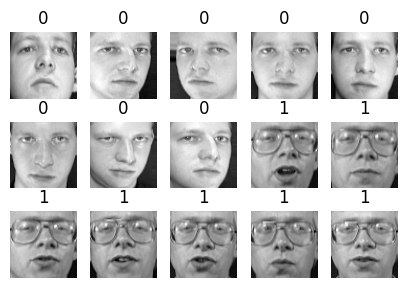

In [74]:
plot_faces(df_train.iloc[:15, :-1].values, df_train.iloc[:15, -1].values)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [75]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(df_train.iloc[:, :-1].values)
X_valid_pca = pca.transform(df_val.iloc[:, :-1].values)
X_test_pca = pca.transform(df_test.iloc[:, :-1].values)

pca.n_components_

221

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

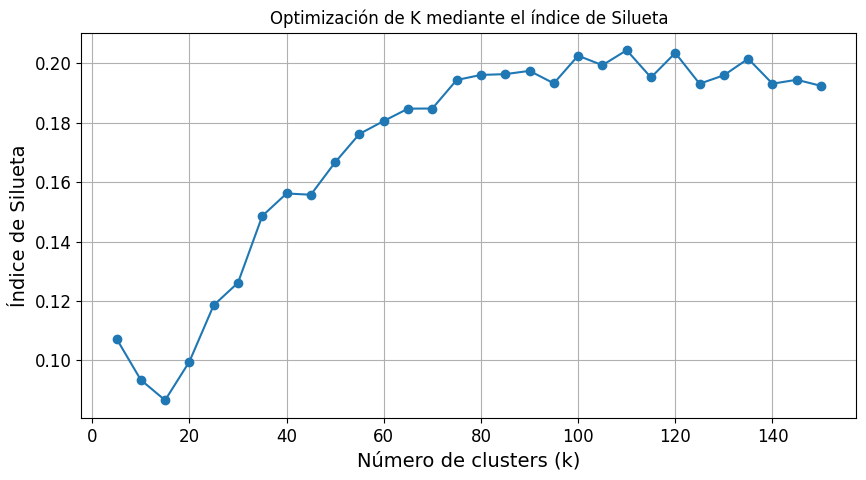

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Verificar si el dataset está cargado
if 'X_train_pca' in locals():
    # Extraer las features (sin la columna 'target')
    X_train = df_train.drop(columns=['target']).values

    # Lista para almacenar los scores de silueta
    silhouette_scores = []
    k_values = list(range(5, 151, 5))  # K desde 5 hasta 150 con incrementos de 5

    # Probar diferentes valores de k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_train)
        score = silhouette_score(X_train, labels)
        silhouette_scores.append(score)

    # Determinar el mejor k
    best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

    # Graficar la evolución del índice de silueta
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Índice de Silueta')
    plt.title('Optimización de K mediante el índice de Silueta')
    plt.grid(True)
    plt.show()

    best_k
else:
    print("El dataset no está cargado. Asegúrate de haberlo descargado correctamente.")



### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

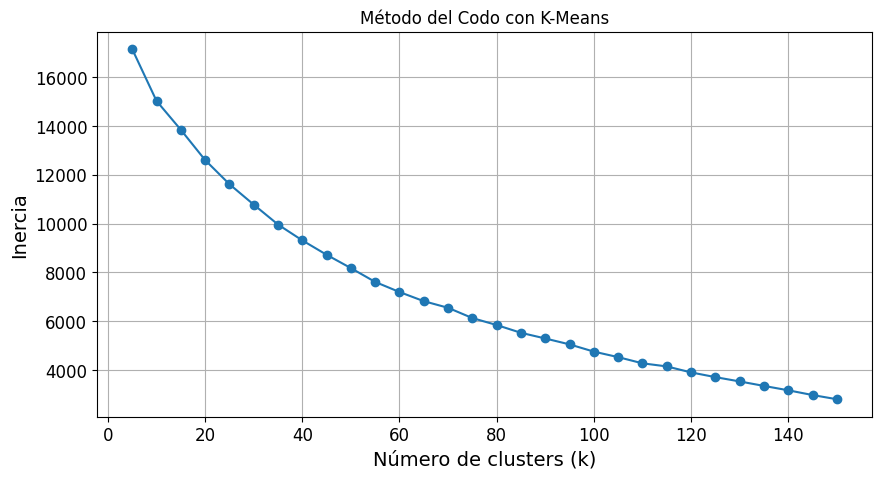

In [77]:
# Aplicar el método del codo usando la métrica de inercia
if 'df_train' in locals():
    inertia_scores = []

    # Probar diferentes valores de k
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_train)
        inertia_scores.append(kmeans.inertia_)  # Guardar la inercia

    # Graficar la evolución de la inercia
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, inertia_scores, marker='o', linestyle='-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo con K-Means')
    plt.grid(True)
    plt.show()

else:
    print("El dataset no está cargado. Asegúrate de haberlo descargado correctamente.")


### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [82]:
# Verificar si el dataset está disponible y si best_k ha sido calculado
if 'df_train' in locals() and 'best_k' in locals():
    # Entrenar el modelo con el mejor k encontrado
    best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    best_model.fit(X_train)

    # Mostrar el número óptimo de clusters
    print(best_k)
else:
    print("El dataset no está cargado o el mejor k aún no ha sido calculado.")


110


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

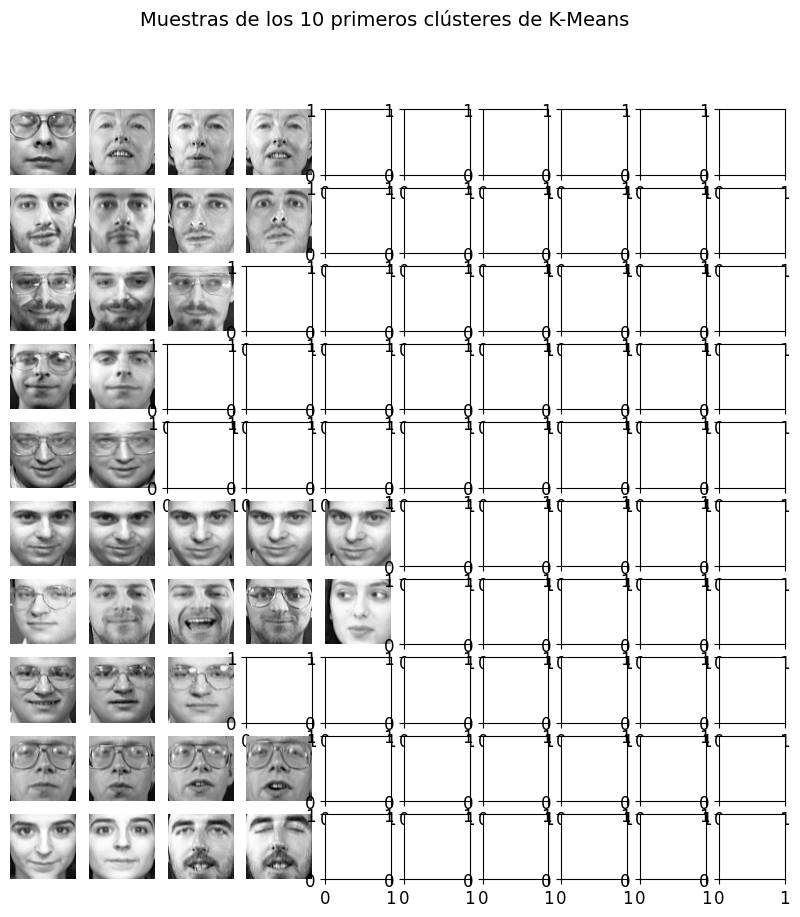

In [79]:
# Verificar si el dataset y el modelo están disponibles
if 'df_train' in locals() and 'best_model' in locals() and 'images' in locals():
    # Obtener las etiquetas asignadas por K-Means
    labels = best_model.labels_

    # Crear una figura para visualizar los primeros 10 clústeres
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))

    # Para cada uno de los 10 primeros clusters, mostrar algunas imágenes
    for cluster_id in range(10):
        # Obtener índices de imágenes en el cluster actual
        cluster_indices = np.where(labels == cluster_id)[0][:10]  # Tomar hasta 10 imágenes

        for i, idx in enumerate(cluster_indices):
            ax = axes[cluster_id, i]
            ax.imshow(images[idx], cmap="gray")
            ax.axis("off")

    plt.suptitle("Muestras de los 10 primeros clústeres de K-Means", fontsize=14)
    plt.show()
else:
    print("El dataset, el modelo o las imágenes originales no están disponibles.")


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

0.95

RandomForest con K-Means
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         1
           1     1.0000    1.0000    1.0000         1
           2     1.0000    1.0000    1.0000         1
           3     1.0000    1.0000    1.0000         1
           4     1.0000    1.0000    1.0000         1
           5     0.5000    1.0000    0.6667         1
           6     1.0000    1.0000    1.0000         1
           7     0.0000    0.0000    0.0000         1
           8     1.0000    1.0000    1.0000         1
           9     1.0000    1.0000    1.0000         1
          10     1.0000    1.0000    1.0000         1
          11     1.0000    1.0000    1.0000         1
          12     1.0000    1.0000    1.0000         1
          13     1.0000    1.0000    1.0000         1
          14     1.0000    1.0000    1.0000         1
          15     0.0000    0.0000    0.0000         1
          16     1.0000    1.0000    1.0000       

c:\Users\juanmoreno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmoreno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmoreno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

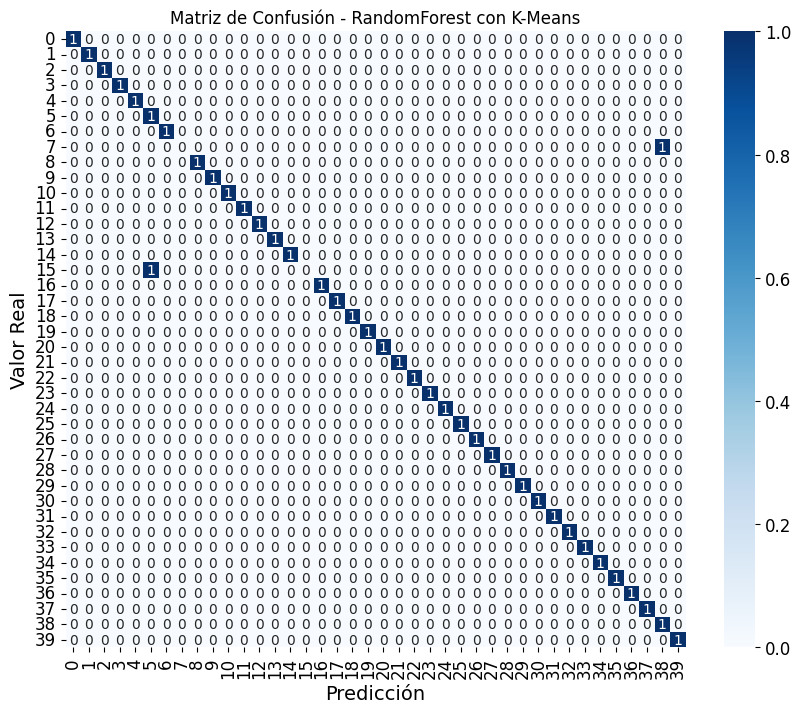

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Verificar si el dataset está cargado
if 'df_train' in locals() and 'df_val' in locals():
    # Extraer features y etiquetas
    X_train = df_train.drop(columns=['target']).values
    y_train = df_train['target'].values

    X_val = df_val.drop(columns=['target']).values
    y_val = df_val['target'].values

    # Entrenar el modelo RandomForest con 150 árboles
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de validación
    y_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Mostrar la precisión del modelo
    print(accuracy)
    evaluar_modelo(y_val, y_pred, title="RandomForest con K-Means")
else:
    print("El dataset de entrenamiento o validación no está disponible.")


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.


RandomForest con K-Means (Reducción de Dimensionalidad)
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     1.0000    1.0000    1.0000         1
           2     1.0000    1.0000    1.0000         1
           3     0.0000    0.0000    0.0000         1
           4     1.0000    1.0000    1.0000         1
           5     1.0000    1.0000    1.0000         1
           6     0.0000    0.0000    0.0000         1
           7     1.0000    1.0000    1.0000         1
           8     1.0000    1.0000    1.0000         1
           9     1.0000    1.0000    1.0000         1
          10     1.0000    1.0000    1.0000         1
          11     1.0000    1.0000    1.0000         1
          12     1.0000    1.0000    1.0000         1
          13     1.0000    1.0000    1.0000         1
          14     1.0000    1.0000    1.0000         1
          15     1.0000    1.0000    1.0000         1
          16     0.0000 

c:\Users\juanmoreno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmoreno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmoreno\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

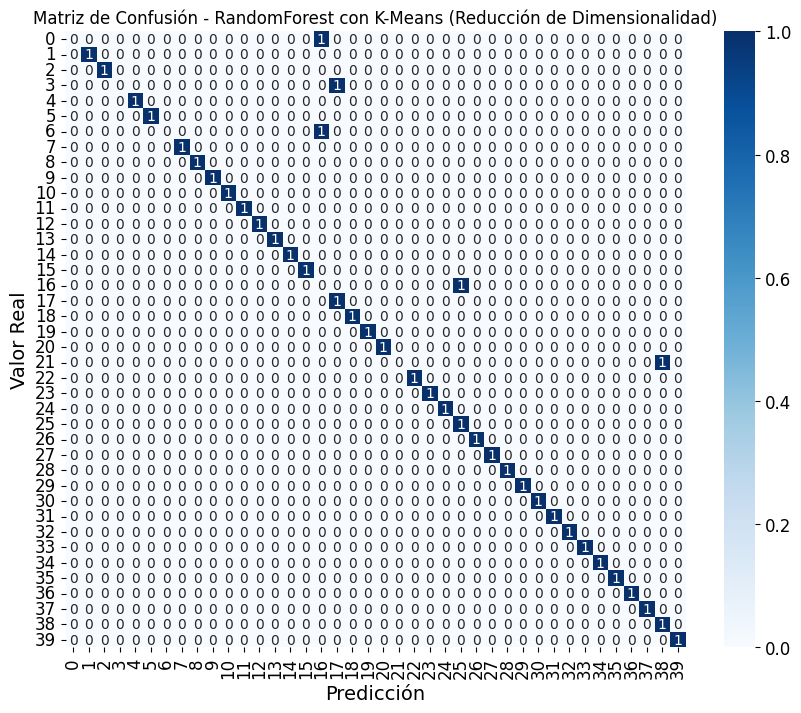

In [86]:
# Verificar si el dataset y el modelo K-Means están disponibles
if 'df_train' in locals() and 'df_val' in locals() and 'best_model' in locals():
    # Extraer features y etiquetas
    X_train = df_train.drop(columns=['target']).values
    y_train = df_train['target'].values

    X_val = df_val.drop(columns=['target']).values
    y_val = df_val['target'].values

    # Transformar las features con las distancias a los centroides de K-Means
    X_train_reduced = best_model.transform(X_train)
    X_val_reduced = best_model.transform(X_val)

    # Entrenar un nuevo RandomForest con las features reducidas
    rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model_reduced.fit(X_train_reduced, y_train)

    # Evaluar el modelo en el conjunto de validación reducido
    y_pred_reduced = rf_model_reduced.predict(X_val_reduced)
    accuracy_reduced = accuracy_score(y_val, y_pred_reduced)

    # Si el modelo RandomForest reducido ha sido entrenado, evaluar métricas
    if 'y_val' in locals() and 'y_pred_reduced' in locals():
        evaluar_modelo(y_val, y_pred_reduced, title="RandomForest con K-Means (Reducción de Dimensionalidad)")
    else:
        print("El modelo o los datos de validación no están disponibles.")
else:
    print("El dataset o el modelo K-Means no están disponibles.")


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)